<a href="https://colab.research.google.com/github/jai2509/fraud-detection-/blob/main/Financial_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341829 entries, 0 to 341828
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            341829 non-null  int64  
 1   type            341829 non-null  object 
 2   amount          341829 non-null  float64
 3   nameOrig        341829 non-null  object 
 4   oldbalanceOrg   341829 non-null  float64
 5   newbalanceOrig  341829 non-null  float64
 6   nameDest        341828 non-null  object 
 7   oldbalanceDest  341828 non-null  float64
 8   newbalanceDest  341828 non-null  float64
 9   isFraud         341828 non-null  float64
 10  isFlaggedFraud  341828 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 28.7+ MB


None

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68328
         1.0       1.00      1.00      1.00     68327

    accuracy                           1.00    136655
   macro avg       1.00      1.00      1.00    136655
weighted avg       1.00      1.00      1.00    136655

Accuracy Score: 0.9994
Precision: 0.9989
Recall: 0.9999
F1 Score: 0.9994
ROC-AUC Score: 1.0000


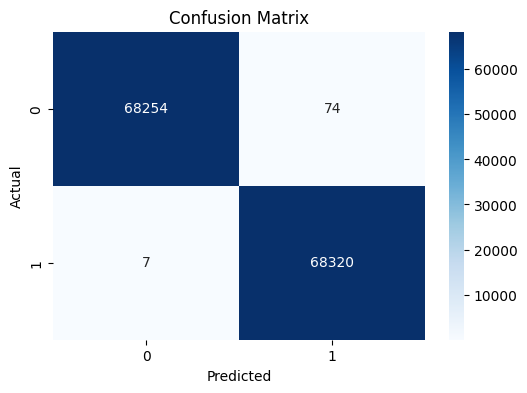

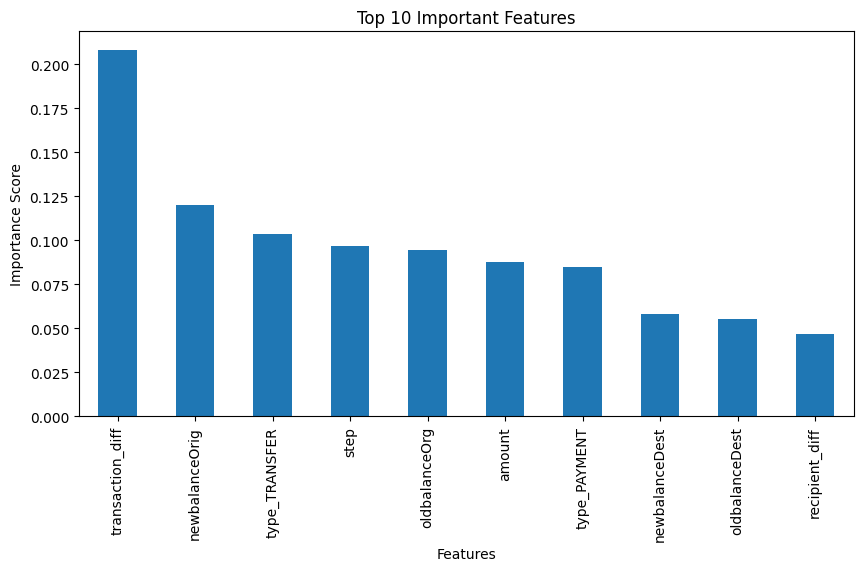

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support, accuracy_score
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('/content/Fraud.csv')

# Display basic info
display(df.head())
display(df.info())

def data_preprocessing(df):
    # Drop unnecessary columns
    df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

    # One-Hot Encoding for 'type' column
    df = pd.get_dummies(df, columns=['type'], drop_first=True)

    # Feature Engineering
    df['transaction_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
    df['recipient_diff'] = df['oldbalanceDest'] - df['newbalanceDest']

    # Handle missing values
    df.fillna(0, inplace=True)  # Replace NaNs with 0

    return df

df = data_preprocessing(df)

# Handle Class Imbalance
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud'].fillna(0)  # Ensure no NaN values in target
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Precision, Recall, F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
feature_importances[:10].plot(kind='bar')
plt.title('Top 10 Important Features')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()
